In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # https://plotly.com/python/
from pprint import pprint
import plotly.graph_objs as go
# from statistics import mode, mean, median

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn import svm
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier

## Parte 1: Preparação dos dados

In [2]:
df = pd.read_csv('frequency_parameters.csv', sep=',')


In [3]:
df.head

<bound method NDFrame.head of      FP1_THETA  FP1_ALFA  FP1_LOW_BETA  FP1_HIGH_BETA  FP1_GAMMA  FP2_THETA  \
0     0.003122  0.000746      0.001290       0.003108   0.000984   0.005411   
1     0.003605  0.000666      0.001151       0.003855   0.001076   0.006041   
2     0.003238  0.000703      0.001059       0.003332   0.001057   0.006116   
3     0.002924  0.000697      0.001280       0.003898   0.001035   0.005723   
4     0.002708  0.000764      0.001208       0.003596   0.001209   0.004032   
..         ...       ...           ...            ...        ...        ...   
275   0.017603  0.001304      0.000946       0.000722   0.000534   0.026915   
276   0.012351  0.001250      0.000720       0.000617   0.000463   0.024394   
277   0.010578  0.001124      0.000813       0.000886   0.000451   0.017699   
278   0.008294  0.000932      0.001500       0.000572   0.001109   0.002390   
279   0.011787  0.001186      0.001903       0.000585   0.001153   0.004362   

     FP2_ALFA  FP2_LO

In [4]:
df.iloc[:,:]

,FP1_THETA,FP1_ALFA,FP1_LOW_BETA,FP1_HIGH_BETA,FP1_GAMMA,FP2_THETA,FP2_ALFA,FP2_LOW_BETA,FP2_HIGH_BETA,FP2_GAMMA,...,PZ_ALFA,PZ_LOW_BETA,PZ_HIGH_BETA,PZ_GAMMA,A2-A1_THETA,A2-A1_ALFA,A2-A1_LOW_BETA,A2-A1_HIGH_BETA,A2-A1_GAMMA,target_class
0,0.003122,0.000746,0.001290,0.003108,0.000984,0.005411,0.001114,0.001699,0.003875,0.001397,...,0.001380,0.001883,0.007343,0.001822,0.000364,0.000256,0.000186,0.000429,0.000132,0.0
1,0.003605,0.000666,0.001151,0.003855,0.001076,0.006041,0.000956,0.001577,0.004728,0.001484,...,0.001058,0.001480,0.006026,0.001975,0.000437,0.000203,0.000169,0.000577,0.000147,0.0
2,0.003238,0.000703,0.001059,0.003332,0.001057,0.006116,0.001001,0.001324,0.004140,0.001483,...,0.000913,0.001415,0.006110,0.001771,0.000414,0.000258,0.000201,0.000497,0.000127,0.0
3,0.002924,0.000697,0.001280,0.003898,0.001035,0.005723,0.000899,0.001609,0.004823,0.001454,...,0.001361,0.001626,0.006907,0.001866,0.000388,0.000225,0.000208,0.000738,0.000156,0.0
4,0.002708,0.000764,0.001208,0.003596,0.001209,0.004032,0.000965,0.001529,0.004449,0.001588,...,0.001297,0.001704,0.007012,0.002137,0.000429,0.000291,0.000206,0.000931,0.000164,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.017603,0.001304,0.000946,0.000722,0.000534,0.026915,0.001756,0.000780,0.000780,0.001292,...,0.001556,0.001597,0.001253,0.000818,0.001597,0.000315,0.000406,0.000297,0.000594,1.0
276,0.012351,0.001250,0.000720,0.000617,0.000463,0.024394,0.001063,0.000664,0.000588,0.000297,...,0.001480,0.000759,0.001053,0.000447,0.001498,0.000313,0.000192,0.000118,0.000272,1.0
277,0.010578,0.001124,0.000813,0.000886,0.000451,0.017699,0.001011,0.000729,0.000940,0.000322,...,0.001228,0.001306,0.002223,0.000499,0.003543,0.000377,0.000244,0.000171,0.000335,1.0
278,0.008294,0.000932,0.001500,0.000572,0.001109,0.002390,0.000732,0.002013,0.000458,0.001094,...,0.001144,0.000830,0.000611,0.000839,0.000880,0.000215,0.000341,0.000201,0.000323,1.0


### Data Correlation

In [5]:
df.corr()

,FP1_THETA,FP1_ALFA,FP1_LOW_BETA,FP1_HIGH_BETA,FP1_GAMMA,FP2_THETA,FP2_ALFA,FP2_LOW_BETA,FP2_HIGH_BETA,FP2_GAMMA,...,PZ_ALFA,PZ_LOW_BETA,PZ_HIGH_BETA,PZ_GAMMA,A2-A1_THETA,A2-A1_ALFA,A2-A1_LOW_BETA,A2-A1_HIGH_BETA,A2-A1_GAMMA,target_class
FP1_THETA,1.000000,0.675700,0.296242,-0.016445,0.069708,0.599955,0.327981,0.155905,-0.122232,-0.094639,...,0.209439,0.187721,0.174801,0.152938,0.075388,0.250544,0.218135,0.098689,0.232739,0.223113
FP1_ALFA,0.675700,1.000000,0.486663,0.052658,0.136617,0.524570,0.681007,0.353953,-0.062006,0.139917,...,0.356177,0.181737,0.066362,0.197990,0.175763,0.387682,0.201203,0.054445,0.258477,0.338637
FP1_LOW_BETA,0.296242,0.486663,1.000000,0.259450,0.198015,0.216722,0.343296,0.701525,0.074558,0.244789,...,0.398502,0.580112,0.214635,0.394860,0.142324,0.185707,0.296755,0.170805,0.177365,-0.012981
FP1_HIGH_BETA,-0.016445,0.052658,0.259450,1.000000,0.408496,0.038439,0.085054,0.322827,0.848121,0.473591,...,0.085389,0.082907,0.590388,0.646167,0.053939,0.104607,0.250794,0.590210,0.237683,-0.079482
FP1_GAMMA,0.069708,0.136617,0.198015,0.408496,1.000000,0.245420,0.409159,0.562876,0.675173,0.853516,...,0.101318,0.017882,0.094954,0.371299,0.027494,-0.092701,0.020960,0.140334,0.088403,0.031727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A2-A1_ALFA,0.250544,0.387682,0.185707,0.104607,-0.092701,0.297353,0.342310,0.093883,-0.003479,-0.012700,...,0.156439,0.018135,0.215186,0.066088,0.661252,1.000000,0.675509,0.546065,0.627850,0.187642
A2-A1_LOW_BETA,0.218135,0.201203,0.296755,0.250794,0.020960,0.273051,0.234255,0.291644,0.147729,0.043846,...,0.082191,0.277128,0.413144,0.141946,0.472204,0.675509,1.000000,0.701137,0.697117,0.074571
A2-A1_HIGH_BETA,0.098689,0.054445,0.170805,0.590210,0.140334,0.122208,0.101055,0.184128,0.493830,0.230856,...,-0.040657,0.074079,0.497004,0.371213,0.398383,0.546065,0.701137,1.000000,0.669901,0.086929
A2-A1_GAMMA,0.232739,0.258477,0.177365,0.237683,0.088403,0.308326,0.315604,0.194757,0.172636,0.197216,...,0.123947,0.171363,0.369224,0.190008,0.444988,0.627850,0.697117,0.669901,1.000000,0.215791


### Correlation Threshold

In [6]:
corrTab = df.corr()
hasWonCorr = corrTab[(corrTab['target_class'] > 0.1) | (corrTab['target_class'] < -0.1) ]
hasWonCorr = hasWonCorr['target_class']

varsImportant = hasWonCorr.index[1:]
varsImportant

Index(['FP1_ALFA', 'FP2_THETA', 'FP2_ALFA', 'F3_LOW_BETA', 'F3_HIGH_BETA',
       'F3_GAMMA', 'F4_LOW_BETA', 'F4_HIGH_BETA', 'F4_GAMMA', 'F7_THETA',
       'F7_ALFA', 'F7_LOW_BETA', 'F7_HIGH_BETA', 'F8_THETA', 'F8_ALFA',
       'F8_HIGH_BETA', 'T3_LOW_BETA', 'T3_HIGH_BETA', 'T4_LOW_BETA',
       'C3_LOW_BETA', 'C3_HIGH_BETA', 'C3_GAMMA', 'C4_THETA', 'C4_LOW_BETA',
       'C4_HIGH_BETA', 'C4_GAMMA', 'T5_LOW_BETA', 'T5_HIGH_BETA',
       'T6_LOW_BETA', 'T6_HIGH_BETA', 'P3_LOW_BETA', 'P3_HIGH_BETA', 'P4_ALFA',
       'P4_LOW_BETA', 'P4_HIGH_BETA', 'P4_GAMMA', 'O1_ALFA', 'O1_LOW_BETA',
       'O1_HIGH_BETA', 'O2_LOW_BETA', 'O2_HIGH_BETA', 'FZ_LOW_BETA',
       'FZ_HIGH_BETA', 'FZ_GAMMA', 'CZ_ALFA', 'CZ_LOW_BETA', 'CZ_HIGH_BETA',
       'CZ_GAMMA', 'PZ_ALFA', 'PZ_LOW_BETA', 'PZ_HIGH_BETA', 'PZ_GAMMA',
       'A2-A1_ALFA', 'A2-A1_GAMMA', 'target_class'],
      dtype='object')

### Count Classes

25.00 % of samples are Attentive (1)


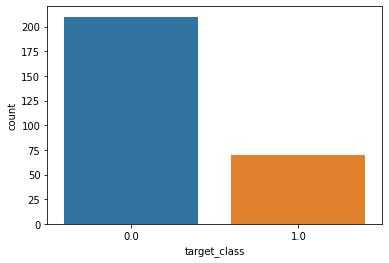

In [7]:
sns.countplot(x=df["target_class"])


print(f'{df.target_class[df.target_class==1].count()/df.target_class.count()*100:.2f} % of samples are Attentive (1)')

In [8]:
X = df.drop(['target_class'], axis = 1)
y = df['target_class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=18, stratify=y) #stratify=y

print(f"""\
X_train: {X_train.shape}\n\
X_test: {X_test.shape}\n\
y_train: {y_train.shape}\n
y_train_counts:\n{y_train.value_counts()}\n
y_test: {y_test.shape}\n
y_test_counts:\n{y_test.value_counts()}\n
""")

X_train: (210, 100)
X_test: (70, 100)
y_train: (210,)

y_train_counts:
0.0    157
1.0     53
Name: target_class, dtype: int64

y_test: (70,)

y_test_counts:
0.0    53
1.0    17
Name: target_class, dtype: int64




## Parte 2: Balanceamento dos dados

In [9]:
# Balancing data - oversampling minority
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

# for i in y_train:
#     if (i == "M")
#         M = M + 1

# print("M")


### Scaling

In [10]:
# Scaling
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Parte 3: Treinamento

In [11]:
y_train_A = np.count_nonzero(y_train == 1)
y_train_R = (y_train == 0).sum()

print(f"""\
X_train: {X_train.shape}\n\
X_test: {X_test.shape}\n\
y_train: {y_train.shape}\n
y_train_A: {y_train_A}\n
y_train_R: {y_train_R}\n
y_test: {y_test.shape}\n
y_test_counts:\n{y_test.value_counts()}\n
""")

X_train: (314, 100)
X_test: (70, 100)
y_train: (314,)

y_train_A: 157

y_train_R: 157

y_test: (70,)

y_test_counts:
0.0    53
1.0    17
Name: target_class, dtype: int64




In [12]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
        #  "Decision Tree": DecisionTreeClassifier(),
        #  "Naive Bayes": GaussianNB(),
        #  "ExtraTreesClassifier": ExtraTreesClassifier(),
         "SupportVectorMachine": svm.SVC(),
           "XGB Classifier": XGBClassifier(),
          "Random Forest": RandomForestClassifier(n_estimators=200,
                                                    max_features="sqrt")} 
                                                  
        


# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
   
    """
   Fits and evaluates given machine learning models.
   models: a dict of different Scikit_Learn machine learning models
   X_train: training data (no labels)
   X_test: testing data (no labels)
   y_train: training labels
   y_test: test labels
   """ 
    # Set random seed
    np.random.seed(18)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit model to data
        model.fit(X_train, y_train)

        if name == "MultiLayerPerceptron":
            model_scores[name] = model.score(X_test, y_test)
        
        else:
            # Evaluate model and append its score to model_scores
            model_scores[name] = cross_val_score(model,
                                                    X_test,
                                                    y_test,
                                                scoring='accuracy',
                                                cv=5
                                                ).mean()
            y_pred = model.predict(X_test)
            print(confusion_matrix(y_test,y_pred))
            print("Classification Report of: ", name)
            print(classification_report(y_test, y_pred))



    return model_scores

In [13]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

model_scores

[[48  5]
 [ 4 13]]
Classification Report of:  Logistic Regression
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91        53
         1.0       0.72      0.76      0.74        17

    accuracy                           0.87        70
   macro avg       0.82      0.84      0.83        70
weighted avg       0.87      0.87      0.87        70

[[43 10]
 [ 8  9]]
Classification Report of:  KNN
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83        53
         1.0       0.47      0.53      0.50        17

    accuracy                           0.74        70
   macro avg       0.66      0.67      0.66        70
weighted avg       0.75      0.74      0.75        70

[[44  9]
 [ 4 13]]
Classification Report of:  SupportVectorMachine
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87        53
         1.0       0.59      0.76      0.67        17


{'KNN': 0.8285714285714286,
 'Logistic Regression': 0.7428571428571429,
 'Random Forest': 0.7857142857142857,
 'SupportVectorMachine': 0.7571428571428572,
 'XGB Classifier': 0.8}

In [14]:
np.random.seed(18)

# Create a hyperparameter grid for XGB Classifier
xgb_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ]}


# Setup random hyperparameter search for XGB Classifier
rs_xgb = RandomizedSearchCV(XGBClassifier(),
                                param_distributions=xgb_grid,
                                cv=2,
                                n_iter=100,
                                verbose=0
                               )

# Fit random hyperparameter search model for XGB Classifier
rs_xgb.fit(X_train, y_train)

# Find best hyperparamaters
rs_xgb.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1}

In [15]:
# Final model - XGBClassifier
model = RandomForestClassifier()
# model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

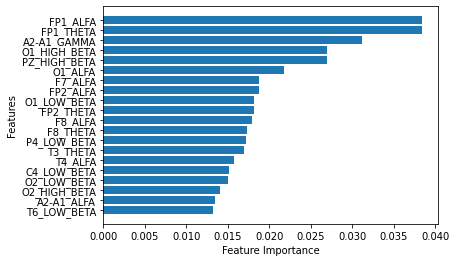

In [16]:
# Helper function for plotting feature importance
def plot_features(columns, importances,n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    # Plot dataframe
    fix, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()
    
plot_features(df.drop(['target_class'],axis=1).columns, model.feature_importances_)

## Parte 3.1: Hyperparameter Tuning de Máquina de Vetores de Suporte




In [17]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [18]:
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [19]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.01)


In [20]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))#Output

[[51  2]
 [ 5 12]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94        53
         1.0       0.86      0.71      0.77        17

    accuracy                           0.90        70
   macro avg       0.88      0.83      0.85        70
weighted avg       0.90      0.90      0.90        70



## Parte 3.2: Hyperparameter Tuning de Floresta Aleatória

In [21]:
rf = RandomForestClassifier(random_state = 42)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [22]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [23]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [24]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [25]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [26]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [27]:
best_random = RandomForestClassifier(
                                    bootstrap= False,
                                    max_depth= 20,
                                    max_features= 'auto',
                                    min_samples_leaf= 1,
                                    min_samples_split= 2,
                                    n_estimators= 1800)
best_random.fit(X_train, y_train)
random_accuracy = best_random.predict(X_test)
# random_accuracy = rf_random.predict(X_test)
print(confusion_matrix(y_test,random_accuracy))
print(classification_report(y_test,random_accuracy))#Output

[[52  1]
 [ 1 16]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        53
         1.0       0.94      0.94      0.94        17

    accuracy                           0.97        70
   macro avg       0.96      0.96      0.96        70
weighted avg       0.97      0.97      0.97        70



## Parte 4: Visualização de dados

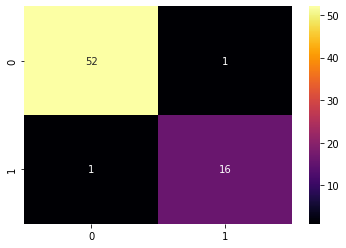

In [28]:
sns.heatmap(confusion_matrix(y_test, random_accuracy), annot=True, fmt='d', cmap="inferno")

0         FP1_ALFA
1      A2-A1_GAMMA
2     O1_HIGH_BETA
3        FP1_THETA
4      O1_LOW_BETA
5     PZ_HIGH_BETA
6         FP2_ALFA
7      C4_LOW_BETA
8          O1_ALFA
9        FP2_THETA
10        F8_THETA
11     P4_LOW_BETA
12         F8_ALFA
13         F7_ALFA
14    P4_HIGH_BETA
15        C4_THETA
16        T3_THETA
17    O2_HIGH_BETA
18      A2-A1_ALFA
19        O1_GAMMA
Name: features, dtype: object


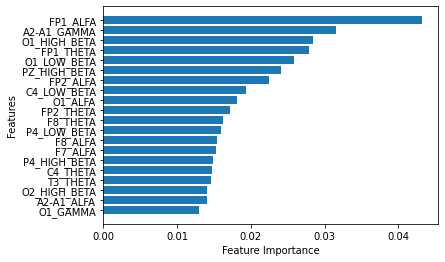

In [29]:
# Helper function for plotting feature importance
def plot_features(columns, importances,n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    # Plot dataframe
    fix, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()
    
    print(df["features"][:20])
    
plot_features(df.drop(['target_class'],axis=1).columns, best_random.feature_importances_)

In [30]:
df['target_class'] = df['target_class'].astype(str) 
df['target_class'] = df['target_class'].replace('0.0','relaxado')
df['target_class'] = df['target_class'].replace('1.0','atento')
df

,FP1_THETA,FP1_ALFA,FP1_LOW_BETA,FP1_HIGH_BETA,FP1_GAMMA,FP2_THETA,FP2_ALFA,FP2_LOW_BETA,FP2_HIGH_BETA,FP2_GAMMA,...,PZ_ALFA,PZ_LOW_BETA,PZ_HIGH_BETA,PZ_GAMMA,A2-A1_THETA,A2-A1_ALFA,A2-A1_LOW_BETA,A2-A1_HIGH_BETA,A2-A1_GAMMA,target_class
0,0.003122,0.000746,0.001290,0.003108,0.000984,0.005411,0.001114,0.001699,0.003875,0.001397,...,0.001380,0.001883,0.007343,0.001822,0.000364,0.000256,0.000186,0.000429,0.000132,relaxado
1,0.003605,0.000666,0.001151,0.003855,0.001076,0.006041,0.000956,0.001577,0.004728,0.001484,...,0.001058,0.001480,0.006026,0.001975,0.000437,0.000203,0.000169,0.000577,0.000147,relaxado
2,0.003238,0.000703,0.001059,0.003332,0.001057,0.006116,0.001001,0.001324,0.004140,0.001483,...,0.000913,0.001415,0.006110,0.001771,0.000414,0.000258,0.000201,0.000497,0.000127,relaxado
3,0.002924,0.000697,0.001280,0.003898,0.001035,0.005723,0.000899,0.001609,0.004823,0.001454,...,0.001361,0.001626,0.006907,0.001866,0.000388,0.000225,0.000208,0.000738,0.000156,relaxado
4,0.002708,0.000764,0.001208,0.003596,0.001209,0.004032,0.000965,0.001529,0.004449,0.001588,...,0.001297,0.001704,0.007012,0.002137,0.000429,0.000291,0.000206,0.000931,0.000164,relaxado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.017603,0.001304,0.000946,0.000722,0.000534,0.026915,0.001756,0.000780,0.000780,0.001292,...,0.001556,0.001597,0.001253,0.000818,0.001597,0.000315,0.000406,0.000297,0.000594,atento
276,0.012351,0.001250,0.000720,0.000617,0.000463,0.024394,0.001063,0.000664,0.000588,0.000297,...,0.001480,0.000759,0.001053,0.000447,0.001498,0.000313,0.000192,0.000118,0.000272,atento
277,0.010578,0.001124,0.000813,0.000886,0.000451,0.017699,0.001011,0.000729,0.000940,0.000322,...,0.001228,0.001306,0.002223,0.000499,0.003543,0.000377,0.000244,0.000171,0.000335,atento
278,0.008294,0.000932,0.001500,0.000572,0.001109,0.002390,0.000732,0.002013,0.000458,0.001094,...,0.001144,0.000830,0.000611,0.000839,0.000880,0.000215,0.000341,0.000201,0.000323,atento


In [31]:
grupo = df.groupby(['target_class']) 

In [32]:
frequencies_labels = ['THETA', 'ALFA', 'LOW_BETA' ,'HIGH_BETA' ,'GAMMA']

for label in frequencies_labels:
        print(df.filter(like=label).columns)


Index(['FP1_THETA', 'FP2_THETA', 'F3_THETA', 'F4_THETA', 'F7_THETA',
       'F8_THETA', 'T3_THETA', 'T4_THETA', 'C3_THETA', 'C4_THETA', 'T5_THETA',
       'T6_THETA', 'P3_THETA', 'P4_THETA', 'O1_THETA', 'O2_THETA', 'FZ_THETA',
       'CZ_THETA', 'PZ_THETA', 'A2-A1_THETA'],
      dtype='object')
Index(['FP1_ALFA', 'FP2_ALFA', 'F3_ALFA', 'F4_ALFA', 'F7_ALFA', 'F8_ALFA',
       'T3_ALFA', 'T4_ALFA', 'C3_ALFA', 'C4_ALFA', 'T5_ALFA', 'T6_ALFA',
       'P3_ALFA', 'P4_ALFA', 'O1_ALFA', 'O2_ALFA', 'FZ_ALFA', 'CZ_ALFA',
       'PZ_ALFA', 'A2-A1_ALFA'],
      dtype='object')
Index(['FP1_LOW_BETA', 'FP2_LOW_BETA', 'F3_LOW_BETA', 'F4_LOW_BETA',
       'F7_LOW_BETA', 'F8_LOW_BETA', 'T3_LOW_BETA', 'T4_LOW_BETA',
       'C3_LOW_BETA', 'C4_LOW_BETA', 'T5_LOW_BETA', 'T6_LOW_BETA',
       'P3_LOW_BETA', 'P4_LOW_BETA', 'O1_LOW_BETA', 'O2_LOW_BETA',
       'FZ_LOW_BETA', 'CZ_LOW_BETA', 'PZ_LOW_BETA', 'A2-A1_LOW_BETA'],
      dtype='object')
Index(['FP1_HIGH_BETA', 'FP2_HIGH_BETA', 'F3_HIGH_BETA', 'F4_HIGH

In [33]:
ex_vars = [ ['FP1_THETA', 'FP2_THETA', 'F3_THETA', 'F4_THETA', 'F7_THETA',
       'F8_THETA', 'T3_THETA', 'T4_THETA', 'C3_THETA', 'C4_THETA', 'T5_THETA',
       'T6_THETA', 'P3_THETA', 'P4_THETA', 'O1_THETA', 'O2_THETA', 'FZ_THETA',
       'CZ_THETA', 'PZ_THETA', 'A2-A1_THETA'],
['FP1_ALFA', 'FP2_ALFA', 'F3_ALFA', 'F4_ALFA', 'F7_ALFA', 'F8_ALFA',
       'T3_ALFA', 'T4_ALFA', 'C3_ALFA', 'C4_ALFA', 'T5_ALFA', 'T6_ALFA',
       'P3_ALFA', 'P4_ALFA', 'O1_ALFA', 'O2_ALFA', 'FZ_ALFA', 'CZ_ALFA',
       'PZ_ALFA', 'A2-A1_ALFA'],
['FP1_LOW_BETA', 'FP2_LOW_BETA', 'F3_LOW_BETA', 'F4_LOW_BETA',
       'F7_LOW_BETA', 'F8_LOW_BETA', 'T3_LOW_BETA', 'T4_LOW_BETA',
       'C3_LOW_BETA', 'C4_LOW_BETA', 'T5_LOW_BETA', 'T6_LOW_BETA',
       'P3_LOW_BETA', 'P4_LOW_BETA', 'O1_LOW_BETA', 'O2_LOW_BETA',
       'FZ_LOW_BETA', 'CZ_LOW_BETA', 'PZ_LOW_BETA', 'A2-A1_LOW_BETA'],
['FP1_HIGH_BETA', 'FP2_HIGH_BETA', 'F3_HIGH_BETA', 'F4_HIGH_BETA',
       'F7_HIGH_BETA', 'F8_HIGH_BETA', 'T3_HIGH_BETA', 'T4_HIGH_BETA',
       'C3_HIGH_BETA', 'C4_HIGH_BETA', 'T5_HIGH_BETA', 'T6_HIGH_BETA',
       'P3_HIGH_BETA', 'P4_HIGH_BETA', 'O1_HIGH_BETA', 'O2_HIGH_BETA',
       'FZ_HIGH_BETA', 'CZ_HIGH_BETA', 'PZ_HIGH_BETA', 'A2-A1_HIGH_BETA'],
['FP1_GAMMA', 'FP2_GAMMA', 'F3_GAMMA', 'F4_GAMMA', 'F7_GAMMA',
       'F8_GAMMA', 'T3_GAMMA', 'T4_GAMMA', 'C3_GAMMA', 'C4_GAMMA', 'T5_GAMMA',
       'T6_GAMMA', 'P3_GAMMA', 'P4_GAMMA', 'O1_GAMMA', 'O2_GAMMA', 'FZ_GAMMA',
       'CZ_GAMMA', 'PZ_GAMMA', 'A2-A1_GAMMA'] ]



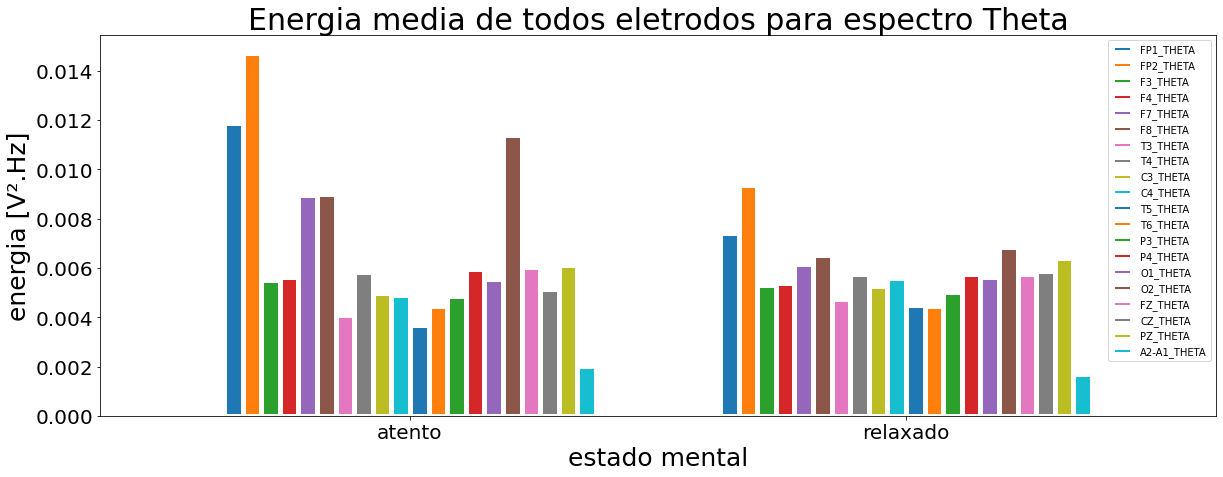

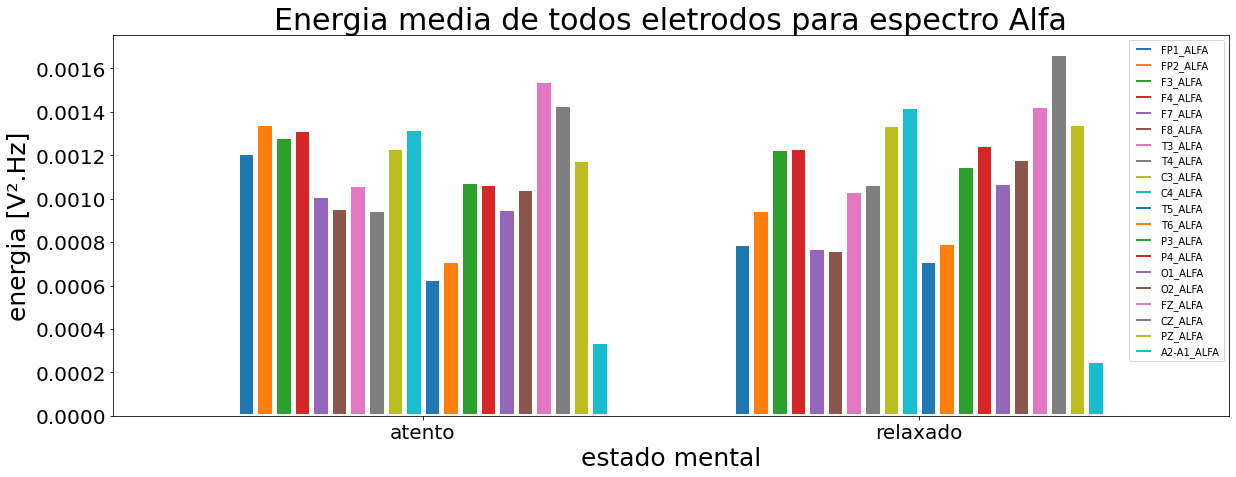

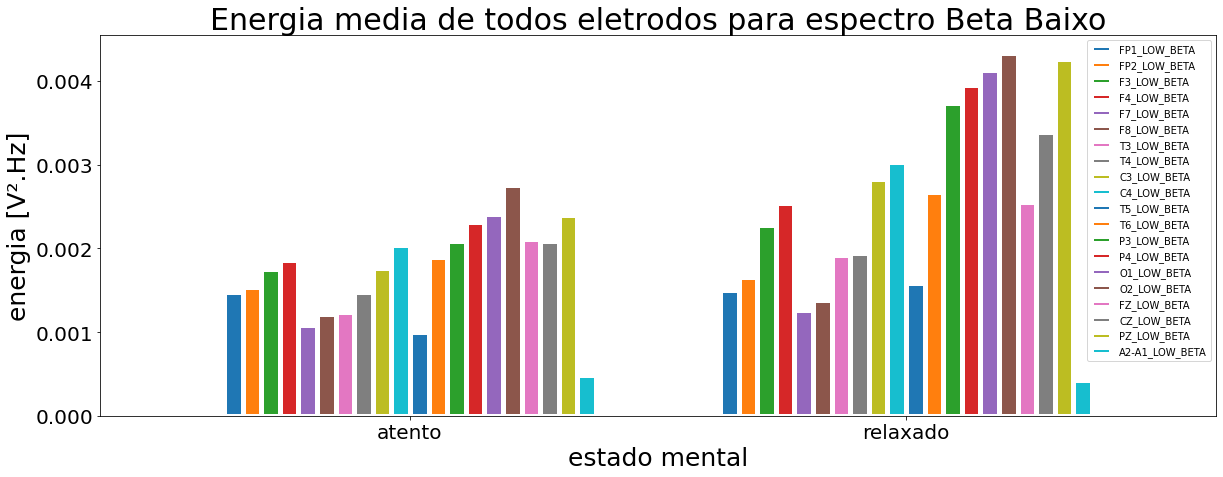

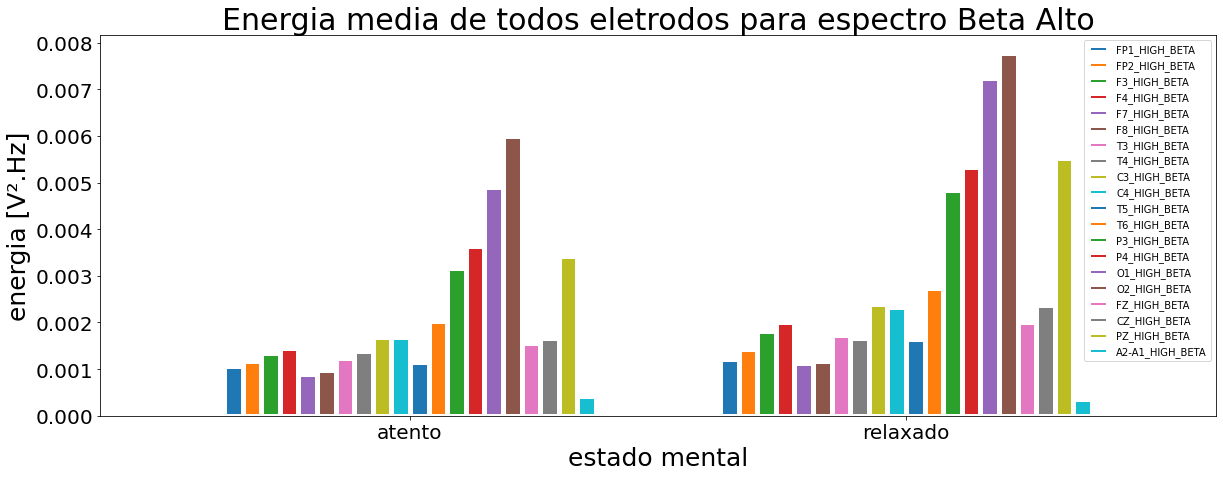

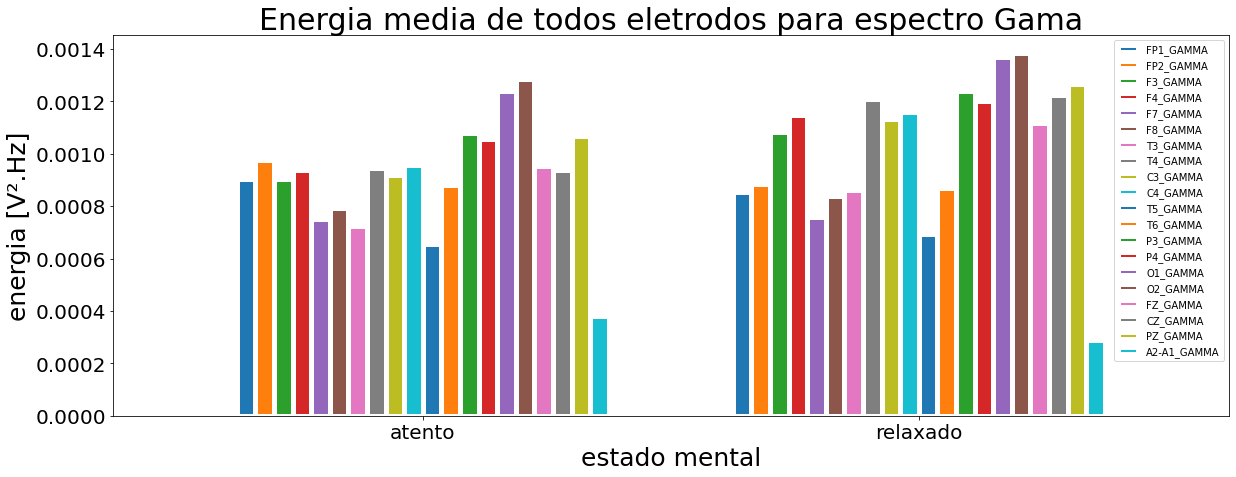

In [34]:
titles = ["Energia media de todos eletrodos para espectro Theta",
          "Energia media de todos eletrodos para espectro Alfa",
          "Energia media de todos eletrodos para espectro Beta Baixo",
          "Energia media de todos eletrodos para espectro Beta Alto",
          "Energia media de todos eletrodos para espectro Gama"]

for _vars, _title in zip(ex_vars,titles):
    mean_bar = df.groupby('target_class')[_vars].mean()
    graph = mean_bar.plot(kind="bar",rot = 0, figsize=(20,7), edgecolor='white', linewidth=5, position = 0.5, title=_title, fontsize=20, width = 0.75)
    graph.set_xlabel("estado mental", fontsize=25)
    graph.set_ylabel("energia [V².Hz]", fontsize=25)
    graph.title.set_size(30)

In [35]:
vars = df.columns

In [36]:
mean_bar = df.groupby('target_class')[vars].mean()

In [37]:
mean_bar

,FP1_THETA,FP1_ALFA,FP1_LOW_BETA,FP1_HIGH_BETA,FP1_GAMMA,FP2_THETA,FP2_ALFA,FP2_LOW_BETA,FP2_HIGH_BETA,FP2_GAMMA,...,PZ_THETA,PZ_ALFA,PZ_LOW_BETA,PZ_HIGH_BETA,PZ_GAMMA,A2-A1_THETA,A2-A1_ALFA,A2-A1_LOW_BETA,A2-A1_HIGH_BETA,A2-A1_GAMMA
target_class,,,,,,,,,,,,,,,,,,,,,
atento,0.011870,0.001215,0.001475,0.00106,0.000904,0.014704,0.00135,0.001541,0.001171,0.000974,...,0.006133,0.001182,0.002404,0.003432,0.001065,0.002011,0.000344,0.000483,0.000415,0.000379
relaxado,0.007401,0.000795,0.001505,0.00121,0.000852,0.009372,0.00095,0.001652,0.001425,0.000886,...,0.006395,0.001351,0.004260,0.005528,0.001265,0.001701,0.000258,0.000426,0.000367,0.000287


In [38]:
electrodes_labels = ['FP1', 'FP2', 'F3', 'F4', 'F7',
       'F8', 'T3', 'T4', 'C3', 'C4', 'T5',
       'T6', 'P3', 'P4', 'O1', 'O2', 'FZ',
       'CZ', 'PZ', 'A2-A1'] 


for label in electrodes_labels:
        print(df.filter(like=label).columns)

Index(['FP1_THETA', 'FP1_ALFA', 'FP1_LOW_BETA', 'FP1_HIGH_BETA', 'FP1_GAMMA'], dtype='object')
Index(['FP2_THETA', 'FP2_ALFA', 'FP2_LOW_BETA', 'FP2_HIGH_BETA', 'FP2_GAMMA'], dtype='object')
Index(['F3_THETA', 'F3_ALFA', 'F3_LOW_BETA', 'F3_HIGH_BETA', 'F3_GAMMA'], dtype='object')
Index(['F4_THETA', 'F4_ALFA', 'F4_LOW_BETA', 'F4_HIGH_BETA', 'F4_GAMMA'], dtype='object')
Index(['F7_THETA', 'F7_ALFA', 'F7_LOW_BETA', 'F7_HIGH_BETA', 'F7_GAMMA'], dtype='object')
Index(['F8_THETA', 'F8_ALFA', 'F8_LOW_BETA', 'F8_HIGH_BETA', 'F8_GAMMA'], dtype='object')
Index(['T3_THETA', 'T3_ALFA', 'T3_LOW_BETA', 'T3_HIGH_BETA', 'T3_GAMMA'], dtype='object')
Index(['T4_THETA', 'T4_ALFA', 'T4_LOW_BETA', 'T4_HIGH_BETA', 'T4_GAMMA'], dtype='object')
Index(['C3_THETA', 'C3_ALFA', 'C3_LOW_BETA', 'C3_HIGH_BETA', 'C3_GAMMA'], dtype='object')
Index(['C4_THETA', 'C4_ALFA', 'C4_LOW_BETA', 'C4_HIGH_BETA', 'C4_GAMMA'], dtype='object')
Index(['T5_THETA', 'T5_ALFA', 'T5_LOW_BETA', 'T5_HIGH_BETA', 'T5_GAMMA'], dtype='object')


In [39]:
mean_bar

,FP1_THETA,FP1_ALFA,FP1_LOW_BETA,FP1_HIGH_BETA,FP1_GAMMA,FP2_THETA,FP2_ALFA,FP2_LOW_BETA,FP2_HIGH_BETA,FP2_GAMMA,...,PZ_THETA,PZ_ALFA,PZ_LOW_BETA,PZ_HIGH_BETA,PZ_GAMMA,A2-A1_THETA,A2-A1_ALFA,A2-A1_LOW_BETA,A2-A1_HIGH_BETA,A2-A1_GAMMA
target_class,,,,,,,,,,,,,,,,,,,,,
atento,0.011870,0.001215,0.001475,0.00106,0.000904,0.014704,0.00135,0.001541,0.001171,0.000974,...,0.006133,0.001182,0.002404,0.003432,0.001065,0.002011,0.000344,0.000483,0.000415,0.000379
relaxado,0.007401,0.000795,0.001505,0.00121,0.000852,0.009372,0.00095,0.001652,0.001425,0.000886,...,0.006395,0.001351,0.004260,0.005528,0.001265,0.001701,0.000258,0.000426,0.000367,0.000287


In [40]:
elec_group = [ ['FP1_THETA', 'FP1_ALFA', 'FP1_LOW_BETA', 'FP1_HIGH_BETA', 'FP1_GAMMA'], 
['FP2_THETA', 'FP2_ALFA', 'FP2_LOW_BETA', 'FP2_HIGH_BETA', 'FP2_GAMMA'], 
['F7_THETA', 'F7_ALFA', 'F7_LOW_BETA', 'F7_HIGH_BETA', 'F7_GAMMA'], 
['F8_THETA', 'F8_ALFA', 'F8_LOW_BETA', 'F8_HIGH_BETA', 'F8_GAMMA'], 
['O2_THETA', 'O2_ALFA', 'O2_LOW_BETA', 'O2_HIGH_BETA', 'O2_GAMMA'] ]

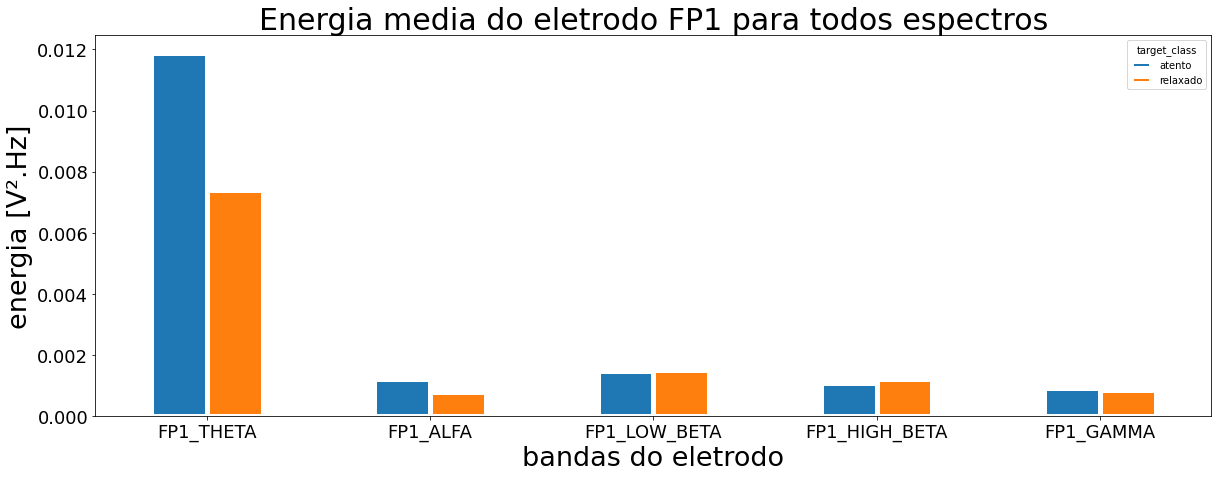

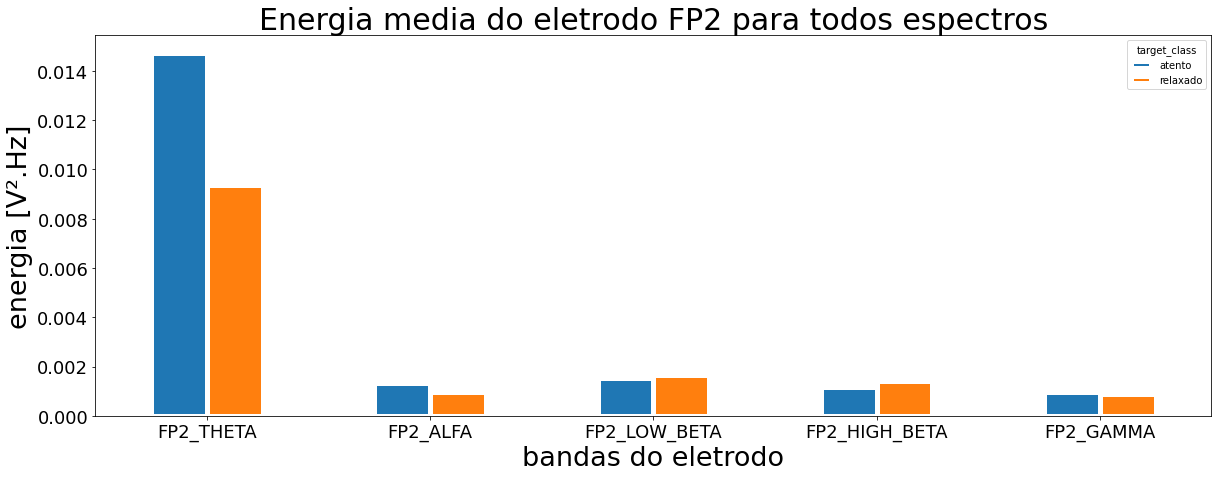

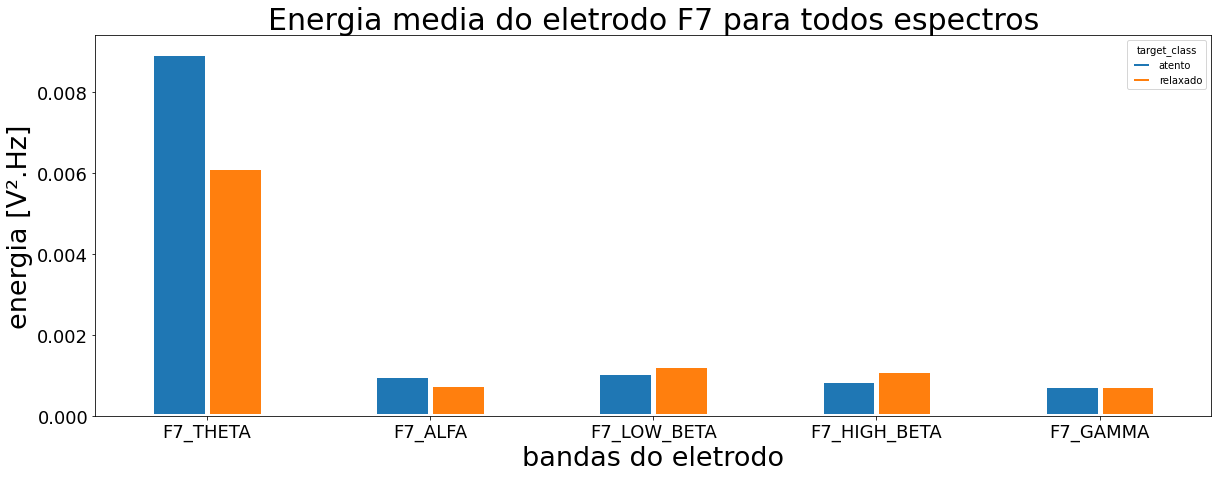

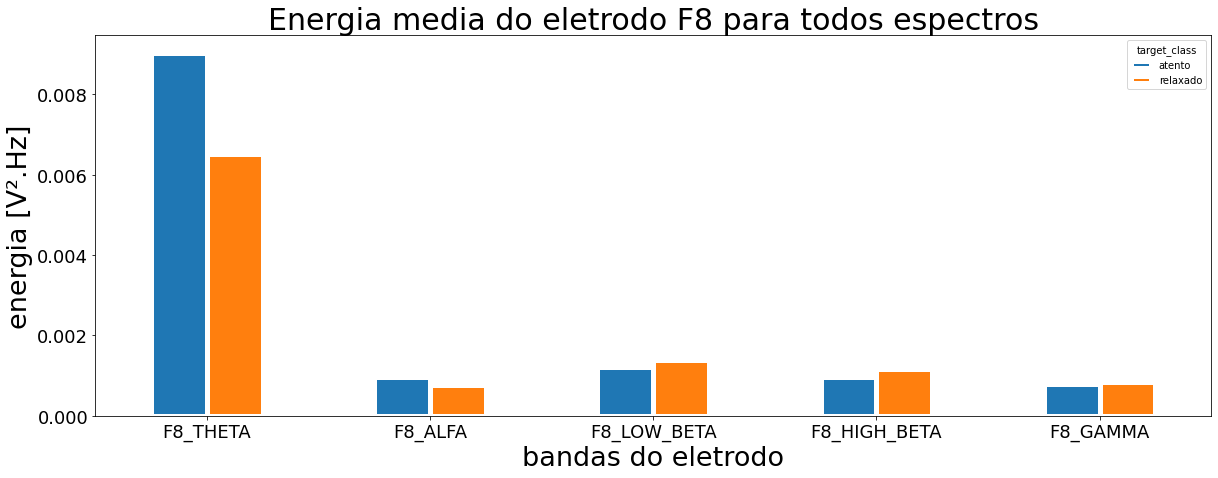

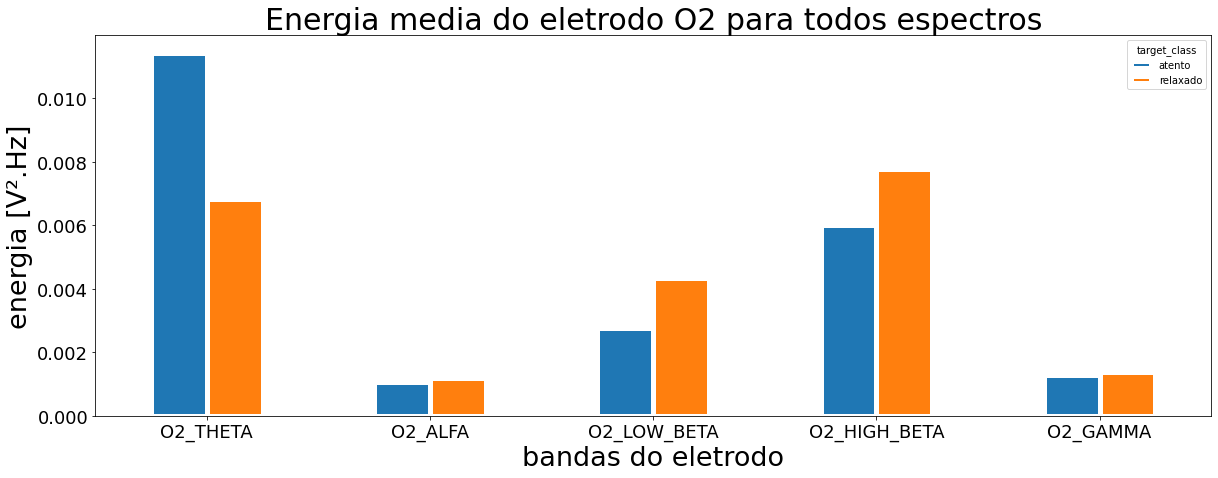

In [41]:
titles = ["Energia media do eletrodo FP1 para todos espectros",
          "Energia media do eletrodo FP2 para todos espectros",
          "Energia media do eletrodo F7 para todos espectros",
          "Energia media do eletrodo F8 para todos espectros",
          "Energia media do eletrodo O2 para todos espectros"]

for elec, _title in zip(elec_group,titles):
    graph=mean_bar[elec]
    graph = pd.DataFrame(graph).transpose()
    graph = graph.plot(kind="bar",rot = 0, figsize=(20,7), edgecolor='white', linewidth=5, position = 0.5, title=_title, fontsize=18, width = 0.5)
    graph.set_xlabel("bandas do eletrodo", fontsize=27)
    graph.set_ylabel("energia [V².Hz]", fontsize=27)
    graph.title.set_size(30)



###Energia média dos eletrodos FP1, FP2, F7, F8 e O2 no espectro Theta

In [42]:
elec_group = [ 'FP1_THETA', 'FP2_THETA', 'F7_THETA', 'F8_THETA','O2_THETA'] 

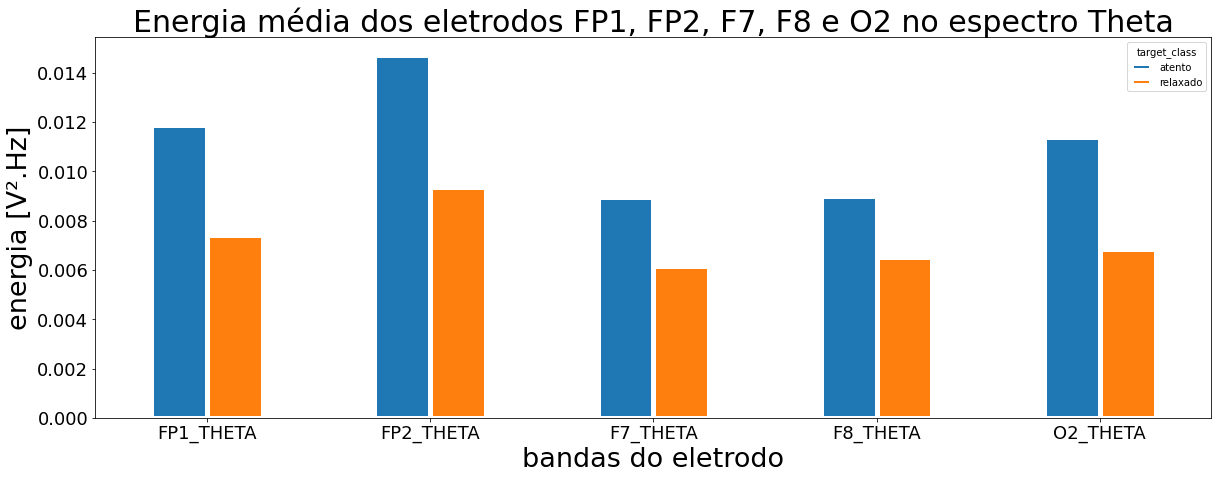

In [50]:
titles = "Energia média dos eletrodos FP1, FP2, F7, F8 e O2 no espectro Theta"

# for elec in elec_group:
graph=mean_bar[elec_group]
graph = pd.DataFrame(graph).transpose()
graph = graph.plot(kind="bar",rot = 0, figsize=(20,7), edgecolor='white', linewidth=5, position = 0.5, title=titles, fontsize=18, width = 0.5)
graph.set_xlabel("bandas do eletrodo", fontsize=27)
graph.set_ylabel("energia [V².Hz]", fontsize=27)
graph.title.set_size(30)

